In [3]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
f = open("hurriyet.txt","r", encoding="utf8")

In [5]:
text = f.read()

In [6]:
t_list = text.split("\n")

In [7]:
corpus = []

In [8]:
for cumle in t_list:
    corpus.append(cumle.split())

In [9]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [ ]:
model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1)

In [12]:
model.wv["ankara"]

array([ 0.19254197,  0.00156364, -0.359911  , -0.04898601,  0.17900698,
        0.20787106,  0.50927573,  0.11618466, -0.2859792 ,  0.19864316,
       -0.05650065,  0.53216404,  0.30087838,  0.23643088,  0.7464012 ,
       -0.48016593, -0.00510034, -0.28630874,  0.5231179 , -0.48178846,
       -0.0778396 ,  0.28798014,  0.13295388, -0.26211435, -0.01340612,
       -0.43511888,  0.2209023 ,  0.19205816, -0.02562204,  0.24228463,
        0.23959327,  0.12595262, -0.28327262,  0.26602647, -0.3686312 ,
        0.15598099, -0.69662595, -0.05583533,  0.16568714,  0.33323804,
        0.36445805,  0.28291318,  0.31662494, -0.41216558,  0.66257286,
       -0.68931997, -0.51167405, -0.3159459 ,  0.19880144, -0.2687914 ,
       -0.66669774, -0.16428824, -0.10899009,  0.50608236, -0.29353517,
        0.14788799, -0.05749931,  0.4986498 ,  0.46294865,  0.16634184,
       -0.06442086,  0.05923864,  0.39771664, -0.53177977,  0.12637675,
       -0.02197764,  0.0861398 , -0.08551943,  0.12012106,  0.36

In [13]:
model.wv.most_similar("youtube")

C:\Users\coban\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('whatsapp', 0.7500645518302917),
 ('paylaşım', 0.7457943558692932),
 ('twitter', 0.7315108776092529),
 ('internete', 0.7291727066040039),
 ('twıtter', 0.7227368354797363),
 ('facebook', 0.7050420045852661),
 ('yayınlandıktan', 0.7049682140350342),
 ('video', 0.7007216215133667),
 ('sitelerine', 0.6995975375175476),
 ('yayınlaması', 0.6947564482688904)]

In [ ]:
model.save("word2vec.model")

In [11]:
model = Word2Vec.load("word2vec.model")

In [14]:
def closestwords_tsneplot(model, word):
    
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
    
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:,0]
    y_coords = Y[:,1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y),xytext=(5, -2), textcoords="offset points")
        
    

C:\Users\coban\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


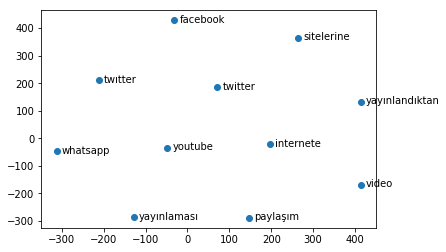

In [16]:
closestwords_tsneplot(model, "youtube")

C:\Users\coban\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


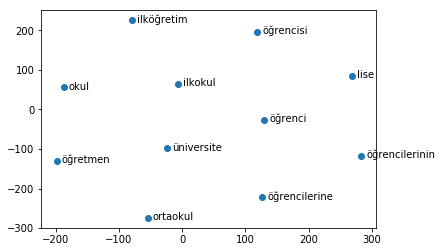

In [17]:
closestwords_tsneplot(model, "üniversite")

C:\Users\coban\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


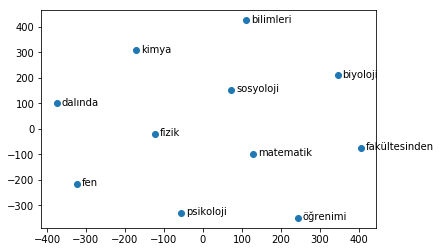

In [18]:
closestwords_tsneplot(model, "matematik")

C:\Users\coban\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


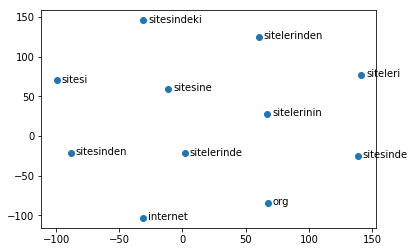

In [21]:
closestwords_tsneplot(model, "internet")